In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%run /Users/fardila/Documents/GitHub/data-viz/Enia_project/code/individual_profs.py

In [3]:
dic_100 = load("L0125",100)
dic_93 = load("L0125",93)
dic_87 = load("L0125",87)

Loaded Profiles_Box_L0125_N1024_CBol_Np200_100.bhp from pickle, took 0.86 seconds
Loaded Profiles_Box_L0125_N1024_CBol_Np200_093.bhp from pickle, took 0.90 seconds
Loaded Profiles_Box_L0125_N1024_CBol_Np200_087.bhp from pickle, took 0.92 seconds


In [4]:
dic_100.keys()

dict_keys(['profiles', 'box_size', 'z', 'sim_name', 'cosmo_name', 'particle_mass'])

In [4]:
z_100, z_93, z_87 = dic_100['z'], dic_93['z'], dic_87['z']
print(z_100, z_93, z_87)

0.0 0.2375289648771286 0.48555418848991394


In [26]:
dic["particle_mass"]

136280315.92816114

In [7]:
dic["profiles"].dtype.names

('id',
 'host_id',
 'Rvir_cat',
 'rs',
 'Mvir_cat',
 'vmax_cat',
 'a_last_mm',
 'x',
 'v',
 'Rbin',
 'Rbin_av',
 'mass',
 'vr',
 'sigmav',
 'vc',
 'vmax_prof',
 'potential',
 'R200c',
 'M200c',
 'R500c',
 'M500c')

In [8]:
dic["profiles"]["id"]

array([174015014, 174552465, 174154314, ..., 175589563, 175043208,
       175594875])

In [9]:
dic["profiles"]["potential"]

array([[-1.43341218e+06, -1.42398674e+06, -1.41396395e+06, ...,
        -3.05963290e+04, -1.60066774e+04,  0.00000000e+00],
       [-1.66513897e+06, -1.64915025e+06, -1.63253577e+06, ...,
        -5.09463114e+04, -2.53844480e+04,  0.00000000e+00],
       [-1.48592547e+06, -1.46580161e+06, -1.44515463e+06, ...,
        -2.31513027e+04, -1.18586370e+04,  0.00000000e+00],
       ...,
       [-5.23818546e+04, -5.22598185e+04, -5.21284618e+04, ...,
        -6.10041287e+03, -3.16572388e+03,  0.00000000e+00],
       [-1.58439295e+04, -1.51532714e+04, -1.44147041e+04, ...,
        -4.94135982e+02, -2.68302769e+02,  0.00000000e+00],
       [-7.62712071e+04, -7.58572529e+04, -7.57858401e+04, ...,
        -6.62725611e+02, -3.47015740e+02,  0.00000000e+00]])

In [11]:
len(dic["profiles"]["potential"][0])

80

In [12]:
len(dic["profiles"]["potential"])

175038

In [13]:
dic["profiles"]["Rbin"]

array([[4.04231491e+01, 4.32272034e+01, 4.62257614e+01, ...,
        7.06978564e+03, 7.56019824e+03, 8.08463037e+03],
       [3.95550003e+01, 4.22988281e+01, 4.52329903e+01, ...,
        6.91795068e+03, 7.39783105e+03, 7.91100000e+03],
       [3.81445007e+01, 4.07904892e+01, 4.36200180e+01, ...,
        6.67126221e+03, 7.13403076e+03, 7.62890039e+03],
       ...,
       [2.85489988e+00, 3.05293703e+00, 3.26471162e+00, ...,
        4.99306213e+02, 5.33941833e+02, 5.70979980e+02],
       [2.82994986e+00, 3.02625632e+00, 3.23618007e+00, ...,
        4.94942596e+02, 5.29275513e+02, 5.65989990e+02],
       [2.54425001e+00, 2.72073793e+00, 2.90946865e+00, ...,
        4.44975220e+02, 4.75842041e+02, 5.08849976e+02]])

In [14]:
dic["profiles"]["Rbin_av"]

array([[2.53962173e+01, 4.18668861e+01, 4.47475891e+01, ...,
        6.84989453e+03, 7.34663867e+03, 7.79609814e+03],
       [2.50229168e+01, 4.09311752e+01, 4.37649231e+01, ...,
        6.69080566e+03, 7.16351807e+03, 7.66271777e+03],
       [2.29419403e+01, 3.94602280e+01, 4.21799698e+01, ...,
        6.46497412e+03, 6.90741699e+03, 7.37540527e+03],
       ...,
       [1.62901187e+00, 2.92643571e+00, 3.07467675e+00, ...,
        4.82817047e+02, 5.16144409e+02, 5.52791809e+02],
       [1.89954031e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.80078278e+02, 5.13770630e+02, 5.49054321e+02],
       [2.14602733e+00, 0.00000000e+00, 2.78360009e+00, ...,
        4.30788696e+02, 4.60752136e+02, 4.92966034e+02]])

## compute mass accretion rates  

In [5]:
import ytree 
import numpy as np
import h5py
from colossus.halo.mass_so import dynamicalTime
from colossus.cosmology import cosmology
import matplotlib.pyplot as plt 
import glob
import pandas as pd
import os 
import sys 

In [6]:
# Working with merger trees: https://ytree.readthedocs.io/en/latest/Arbor.html

def get_id_given_a(my_tree, scale_factor): 
    
    a_idx = np.where(my_tree["tree", "scale_factor"] == scale_factor)[0]
    
    if len(a_idx)==0:
        return -1
    
    id_at_sfnow = my_tree["tree", "uid"][a_idx]

    return np.ndarray.flatten(id_at_sfnow)[0]

def get_treeidx_given_a(my_tree, scale_factor): 
    
    a_idx = np.where(my_tree["tree", "scale_factor"] == scale_factor)[0]
    
    if len(a_idx)==0:
        return (-1, -1)
    
    id_at_sfnow = my_tree["tree", "uid"][a_idx]
    
    if len(id_at_sfnow) > 0 and halo in id_at_sfnow:
        # if yes then find the tree node now, and then the tree node then 
        treeidx = np.where(halo==id_at_sfnow)[0]
        treenow = (my_tree["tree"][a_idx])[treeidx]
        return (treeidx, treenow[0])
    else:
        return (-1, -1 )
    
def get_tree_given_a(my_tree, scale_factor): 
    a_idx = np.where(my_tree["prog", "scale_factor"] == scale_factor)
    
    if len(a_idx)==0:
        return -1 
    
    if len(my_tree["prog"][a_idx]) > 0:
        return my_tree["prog"][a_idx][0]
    else:
        return -1 
    
def get_alltrees_given_a(my_tree, scale_factor): 
    a_idx = np.where(my_tree["tree", "scale_factor"] == scale_factor)
    
    if len(a_idx)==0:
        return -1 
    
    if len(my_tree["tree"][a_idx]) > 0:
        return my_tree["tree"][a_idx]
    else:
        return -1 
    

In [7]:
treedir = "/Users/fardila/Documents/Data/data_viz/Enia_project/trees/"
treefile = 'tree_0_0_1.dat'

In [8]:
a = ytree.load(treedir+treefile)
a.set_selector("max_field_value", "mvir") # the first progenitor descendant will be the most massive one

Performance will be improved by saving this arbor with "save_arbor" and reloading:
	>>> a = ytree.load("/Users/fardila/Documents/Data/data_viz/Enia_project/trees/tree_0_0_1.dat")
	>>> fn = a.save_arbor()
	>>> a = ytree.load(fn)


In [17]:
cosmo = cosmology.setCosmology('planck13') 

## get dynamical time 
z_now = z_100
sf_now = 1./(1+z_now)
dyntime = dynamicalTime(z_now, "200m", definition='crossing')*1e9 # in years
dyntime = dyntime/2. #just to inscrease number of snapshots

# ----- FIND SF 1 TDYN AGO USING SPARTA'S METHOD -------

# ## time now 
time_snapshot = cosmo.age(z_now, inverse = False) *1e9

# ## time back 1tdyn
time_back1dyn = time_snapshot - dyntime

## scale factor itdyn ago
z_back1dyn = cosmo.age(time_back1dyn/1e9, inverse = True) # with inverse = True we compute z(t)
sf_back1dyn = 1/(1+z_back1dyn)


In [18]:
sf_back1dyn

0.827368334038341

find corresponding snapshot

In [25]:
from astropy.io import ascii
snap_z_table = ascii.read('snap_z.txt', names=['snap', 'a', 'z'])
snapshots_we_have=[100,93,87]

closest_snap_to_back1dyn = snap_z_table[np.argmin(abs(snap_z_table['a'] - sf_back1dyn))]['snap']
snapshot_then = snapshots_we_have[np.argmin(abs(snapshots_we_have - closest_snap_to_back1dyn))]

sf_then = snap_z_table[snap_z_table['snap'] == snapshot_then]['a'][0]
print(closest_snap_to_back1dyn, snapshot_then,sf_then )

94 93 0.8081


In [26]:
a_reduced=a[:100]
a_reduced=a

Loading tree roots: 100%|██████████| 8214616832/8214616832 [00:42<00:00, 191287136.73it/s]


In [27]:
ID_now_tree = []
Idx_now_tree = []

# collect all the halost for the given scale factor in the tree 
for itree, tree in enumerate(a_reduced): # a == list of trees for the for loop 
    id_now = get_id_given_a(tree, sf_now) # given_a means given sf 
    
    if id_now == -1: continue 

    ID_now_tree.append(id_now)
    Idx_now_tree.append(itree)

        
print ("Finished collecting all of my halos")       

Finished collecting all of my halos


In [28]:
Idx_now_tree = np.array(Idx_now_tree)
ID_now_tree = np.array(ID_now_tree)

ID_then = []
ID_now = []
Gamma = []
M200b_now = []
M200b_then = []

In [30]:
#ids of halos in catalog 
ID_now_cat = dic_100["profiles"]["id"]

In [31]:
for ihalo, halo in enumerate(ID_now_cat): 
    
    # find in which tree this halo lies
    idx_all_tree = np.where(ID_now_tree == halo)[0]
    
#     print (idx_all_tree)
    if not np.isscalar(idx_all_tree):
        if len(idx_all_tree) == 0: 
            continue 
        else: 
            idx_all_tree = idx_all_tree[0] # get the most massive descendant/progenitor to be the main one 
    
    idx_tree = Idx_now_tree[idx_all_tree]
    
#     print (Idx_now_tree[idx_all_tree], ID_now_tree[idx_all_tree])
    
    Treenow = get_alltrees_given_a(a[idx_tree], sf_now)
    
    for treenow in Treenow:
        treethen = get_tree_given_a(treenow, sf_then)
    
        if treethen == -1: 
            continue

        # get the id of the tree node then 
        id_then = treethen["uid"]
        id_now = treenow["uid"]
        # get m200b of the tree node then 
        m200b_then = float(treethen["M200b"])

        # get m200b now 
        m200b_now = float(treenow["M200b"])

        # compute gamma 
        gamma = np.log10(m200b_now/m200b_then)/np.log10(sf_now/sf_then)

        Gamma.append(gamma)
        ID_then.append(id_then)
        ID_now.append(id_now)
        M200b_now.append(m200b_now)
        M200b_then.append(m200b_then)

In [51]:
ID_then = np.array(ID_then)
ID_now = np.array(ID_now)
Gamma = np.array(Gamma)
M200b_now = np.array(M200b_now)
M200b_then = np.array(M200b_then)

In [41]:
median_gamma = np.median(Gamma)
std_gamma = np.std(Gamma)

Text(0.5, 0, 'Gamma')

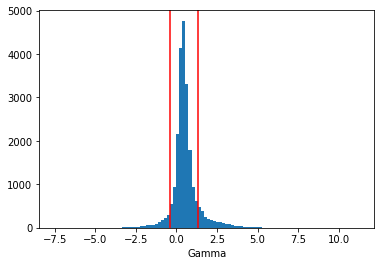

In [42]:
plt.hist(Gamma, bins=100)
plt.axvline(median_gamma+std_gamma, c='r')
plt.axvline(median_gamma-std_gamma, c='r' )
plt.xlabel('Gamma')

In [75]:
high_gamma_mask = [Gamma>median_gamma+std_gamma]
low_gamma_mask = [Gamma<median_gamma-std_gamma]

ID_now_highG = ID_now[high_gamma_mask]
ID_now_lowG = ID_now[low_gamma_mask]

/Users/fardila/anaconda2/envs/colossus/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.
/Users/fardila/anaconda2/envs/colossus/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


In [48]:
len(dic_100["profiles"]['Rbin'])

175038

In [76]:
rho = density(dic_100["profiles"])
Rbin = dic_100["profiles"]['Rbin']
#scale by r200crit
R200c = dic_100["profiles"]['R200c']
Rbin_scaled = np.array([r[0]/r[1] for r in zip(Rbin,R200c)])

highG_profile_ID = [np.where(ID_now_cat == highG_ID)[0][0] for highG_ID in ID_now_highG]
lowG_profile_ID = [np.where(ID_now_cat == lowG_ID)[0][0] for lowG_ID in ID_now_lowG]

In [146]:
def get_median_and_std_profile(profiles, r_bins, rmin=-1, rmax=1, nbin=150):
    """Get the median profiles."""
    common_r_bins = np.logspace(rmin, rmax, nbin)
    profiles= np.log10(profiles)
    
    median = np.nanmedian(np.stack([np.interp(common_r_bins, r_bin, profile) for r_bin, profile in zip(r_bins, profiles)]),
                          axis=0)
    std = np.nanstd(np.stack([np.interp(common_r_bins, r_bin, profile) for r_bin, profile in zip(r_bins, profiles)]),
                          axis=0)

    return np.log10(common_r_bins), median, std


In [147]:
median_r_highG, median_rho_highG, std_rho_highG = get_median_and_std_profile(rho[highG_profile_ID[:100]], Rbin_scaled[highG_profile_ID[:100]])
median_r_lowG, median_rho_lowG, std_rho_lowG = get_median_and_std_profile(rho[lowG_profile_ID[:100]], Rbin_scaled[lowG_profile_ID[:100]])


In [148]:
median_r_lowG

array([-1.        , -0.98657718, -0.97315436, -0.95973154, -0.94630872,
       -0.93288591, -0.91946309, -0.90604027, -0.89261745, -0.87919463,
       -0.86577181, -0.85234899, -0.83892617, -0.82550336, -0.81208054,
       -0.79865772, -0.7852349 , -0.77181208, -0.75838926, -0.74496644,
       -0.73154362, -0.71812081, -0.70469799, -0.69127517, -0.67785235,
       -0.66442953, -0.65100671, -0.63758389, -0.62416107, -0.61073826,
       -0.59731544, -0.58389262, -0.5704698 , -0.55704698, -0.54362416,
       -0.53020134, -0.51677852, -0.5033557 , -0.48993289, -0.47651007,
       -0.46308725, -0.44966443, -0.43624161, -0.42281879, -0.40939597,
       -0.39597315, -0.38255034, -0.36912752, -0.3557047 , -0.34228188,
       -0.32885906, -0.31543624, -0.30201342, -0.2885906 , -0.27516779,
       -0.26174497, -0.24832215, -0.23489933, -0.22147651, -0.20805369,
       -0.19463087, -0.18120805, -0.16778523, -0.15436242, -0.1409396 ,
       -0.12751678, -0.11409396, -0.10067114, -0.08724832, -0.07

In [141]:
std_rho_highG

array([0.10970841, 0.11035217, 0.1110488 , 0.10980252, 0.10651333,
       0.10339841, 0.10235305, 0.10105006, 0.10164579, 0.10293255,
       0.10105029, 0.09607918, 0.09175469, 0.08953512, 0.08910596,
       0.09094272, 0.09215802, 0.09017091, 0.08796767, 0.08593619,
       0.08232421, 0.07836222, 0.07600987, 0.07448033, 0.07341995,
       0.07268744, 0.07229462, 0.07009432, 0.06914645, 0.06988346,
       0.07093434, 0.07231983, 0.07423734, 0.07425113, 0.07353066,
       0.07254411, 0.07251256, 0.07307409, 0.07445434, 0.07672881,
       0.07798468, 0.07791456, 0.07726268, 0.07623401, 0.07502937,
       0.07343066, 0.07209642, 0.07215601, 0.07205098, 0.07027321,
       0.06850743, 0.06910675, 0.06954386, 0.06891578, 0.06922184,
       0.06731997, 0.06480022, 0.06375519, 0.06349408, 0.06395387,
       0.06592797, 0.0687029 , 0.0710686 , 0.07349442, 0.07539376,
       0.07998567, 0.08192108, 0.08462926, 0.08650109, 0.08803175,
       0.08974281, 0.09220142, 0.095715  , 0.09704067, 0.10134

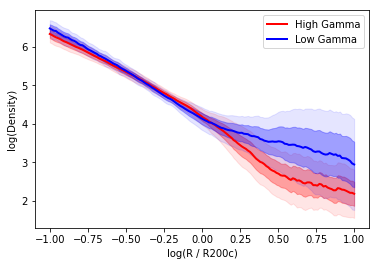

In [155]:
# plt.plot(np.log10(Rbin_scaled[highG_profile_ID[:100]].T), np.log10(rho[highG_profile_ID[:100]].T), c='r', alpha=0.05)
# plt.plot(np.log10(Rbin_scaled[lowG_profile_ID[:100]].T), np.log10(rho[lowG_profile_ID[:100]].T), c='b', alpha=0.05)
plt.plot(median_r_highG, median_rho_highG, c='r', linewidth=2, label='High Gamma')
plt.plot(median_r_lowG, median_rho_lowG, c='b', linewidth=2, label='Low Gamma')

plt.fill_between(median_r_highG, median_rho_highG+std_rho_highG, median_rho_highG-std_rho_highG,
                 alpha=0.3, color='r')
plt.fill_between(median_r_highG, median_rho_highG+2*std_rho_highG, median_rho_highG-2*std_rho_highG,
                 alpha=0.1, color='r')
plt.fill_between(median_r_lowG, median_rho_lowG+std_rho_lowG, median_rho_lowG-std_rho_lowG,
                 alpha=0.3, color='b')
plt.fill_between(median_r_lowG, median_rho_lowG+2*std_rho_lowG, median_rho_lowG-2*std_rho_lowG,
                 alpha=0.1, color='b')

plt.xlabel('log(R / R200c)')
plt.ylabel('log(Density)')
plt.legend()
plt.show()

## check masses and sleect only most massive halos 

In [6]:
masses = dic["profiles"]['M200c']

In [7]:
masses

array([4.52979824e+13, 4.42507186e+13, 3.97790342e+13, ...,
       2.50145152e+10, 2.30853499e+10, 2.51406760e+10])

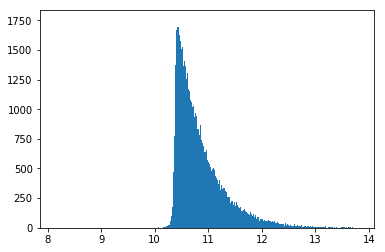

In [8]:
plt.hist(np.log10(masses), 1000)
plt.show()

### use halos above 10^13.5


In [16]:
mass_mask=[np.log10(masses)>13.5]
np.sum(mass_mask)

83

## density profiles 

In [23]:
rho = density(dic["profiles"])[mass_mask]
Rbin = dic["profiles"]['Rbin'][mass_mask]

#scale by r200crit
R200c = dic["profiles"]['R200c'][mass_mask]
Rbin_scaled = np.array([r[0]/r[1] for r in zip(Rbin,R200c)])

/Users/fardila/anaconda2/envs/colossus/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.
/Users/fardila/anaconda2/envs/colossus/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/Users/fardila/anaconda2/envs/colossus/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[se

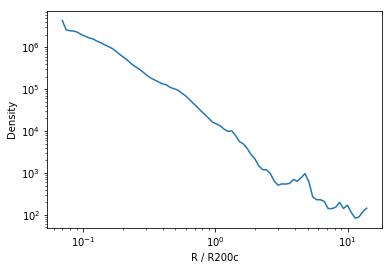

In [26]:
plt.loglog(Rbin_scaled[0], rho[0])

plt.xlabel('R / R200c')
plt.ylabel('Density')                     
plt.show()

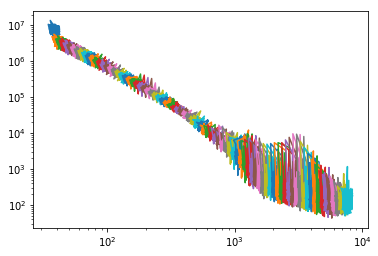

In [18]:
plt.loglog(Rbin, rho)

plt.xlabel('R / R200c')
plt.ylabel('Density')
plt.show()

## what are the units? 